# <span style="color:green">Screener codice base con loader alternativo ad FFN (fonte dati txt)</span>

Architettura di un Bullish Hammer

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def load_data_daily_slim(folder,filename):
    """
    Funzione per il caricamento di uno storico daily
    Fonte dati: Tradestation .txt
    """
    path = folder + filename
    data = pd.read_csv(path, parse_dates = ["Date","Time"])
    data.columns = ["date","time","open","high","low","close","volume","oi"]
    data.set_index("date", inplace = True)
    data.drop(["time","oi"], axis=1, inplace=True)
    
    return data

In [31]:
folder = "data/"
file = "AAPL_daily.txt"

start_date = "2000-01-01"

ticker = file.split("_")[0]

dataset = load_data_daily_slim(folder,file)
dataset = dataset[dataset.index >= pd.to_datetime(start_date, format='%Y-%m-%d', errors='ignore')]
dataset

,open,high,low,close,volume
date,,,,,
2000-01-03,0.94,1.00,0.91,1.00,540948800
2000-01-04,0.97,0.99,0.90,0.92,506665600
2000-01-05,0.93,0.99,0.92,0.93,777795200
2000-01-06,0.95,0.96,0.85,0.85,767984000
2000-01-07,0.86,0.90,0.85,0.89,460992000
...,...,...,...,...,...
2021-08-19,145.03,148.00,144.50,146.70,86960310
2021-08-20,147.44,148.50,146.78,148.19,60549630
2021-08-23,148.31,150.19,147.89,149.71,60131810


In [6]:
dataset.close

date
2000-01-03      1.00
2000-01-04      0.92
2000-01-05      0.93
2000-01-06      0.85
2000-01-07      0.89
               ...  
2021-08-19    146.70
2021-08-20    148.19
2021-08-23    149.71
2021-08-24    149.62
2021-08-25    148.36
Name: close, Length: 5447, dtype: float64

In [7]:
dataset.close > dataset.open

date
2000-01-03     True
2000-01-04    False
2000-01-05    False
2000-01-06    False
2000-01-07     True
              ...  
2021-08-19     True
2021-08-20     True
2021-08-23     True
2021-08-24     True
2021-08-25    False
Length: 5447, dtype: bool

In [8]:
dataset["range_perc"] = (dataset.high - dataset.low) / dataset.low * 100
dataset["open_pos"] = (dataset.open - dataset.low) / (dataset.high - dataset.low) * 100
dataset["close_pos"] = (dataset.close - dataset.low) / (dataset.high - dataset.low) * 100
dataset["SMA20"] = dataset.close.rolling(20).mean()
dataset["STD20"] = dataset.close.rolling(20).std()
dataset["BBU"] = dataset.SMA20 + 2 * dataset.STD20
dataset["BBL"] = dataset.SMA20 - 2 * dataset.STD20
dataset.dropna(inplace = True)
dataset.head(10)

,open,high,low,close,volume,range_perc,open_pos,close_pos,SMA20,STD20,BBU,BBL
date,,,,,,,,,,,,
2000-01-31,0.90,0.93,0.84,0.93,702296000,10.714286,66.666667,100.000000,0.9230,0.062836,1.048673,0.797327
2000-02-01,0.93,0.94,0.89,0.90,317643200,5.617978,80.000000,20.000000,0.9180,0.060315,1.038630,0.797370
2000-02-02,0.90,0.91,0.87,0.88,464195200,4.597701,75.000000,25.000000,0.9160,0.060905,1.037811,0.794189
2000-02-03,0.90,0.93,0.90,0.92,475182400,3.333333,0.000000,66.666667,0.9155,0.060825,1.037151,0.793849
2000-02-04,0.93,0.98,0.93,0.96,425320000,5.376344,0.000000,60.000000,0.9210,0.059551,1.040102,0.801898
2000-02-07,0.96,1.02,0.95,1.02,441056000,7.368421,14.285714,100.000000,0.9275,0.062985,1.053470,0.801530
2000-02-08,1.02,1.04,0.99,1.03,408643200,5.050505,60.000000,80.000000,0.9355,0.065412,1.066323,0.804677
2000-02-09,1.02,1.05,1.00,1.01,300484800,5.000000,40.000000,20.000000,0.9445,0.062448,1.069396,0.819604
2000-02-10,1.01,1.02,0.96,1.01,302982400,6.250000,83.333333,83.333333,0.9560,0.050617,1.057234,0.854766


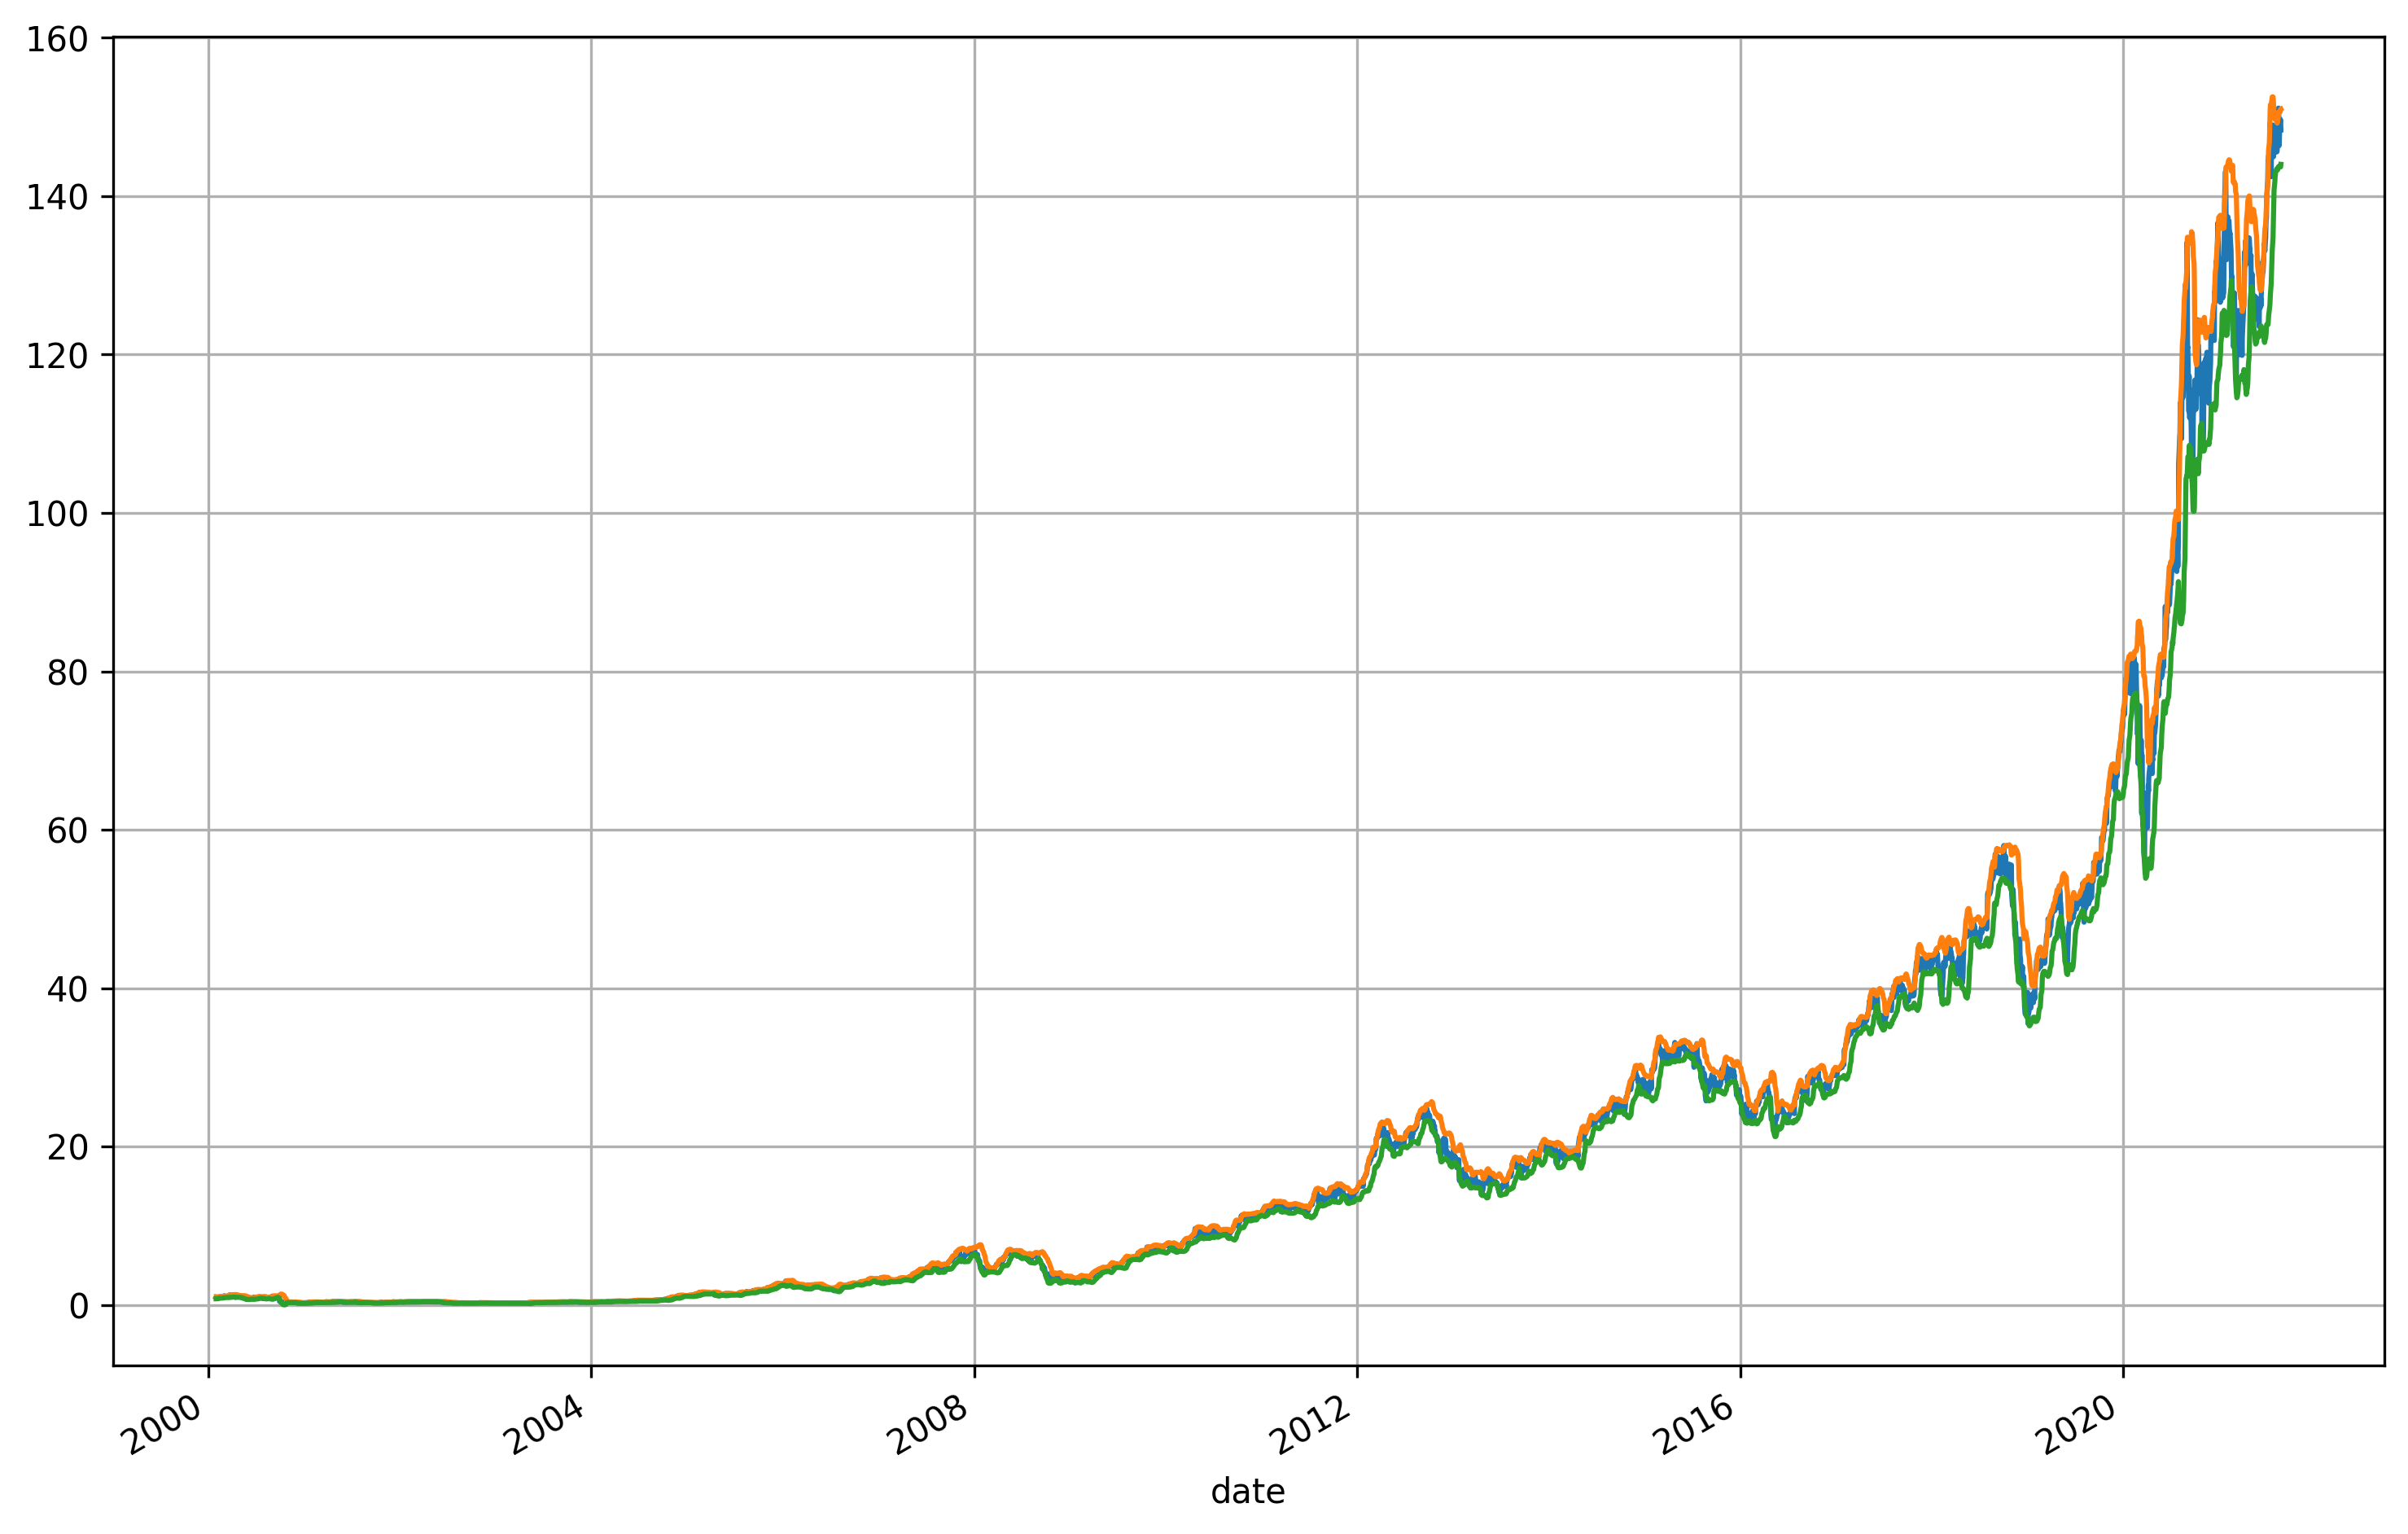

In [9]:
plt.figure(figsize = [12,8], dpi = 300)
dataset.close.plot()
dataset.BBU.plot()
dataset.BBL.plot().grid()

# <span style="color:green">Esempio pattern "Hammer"</span>

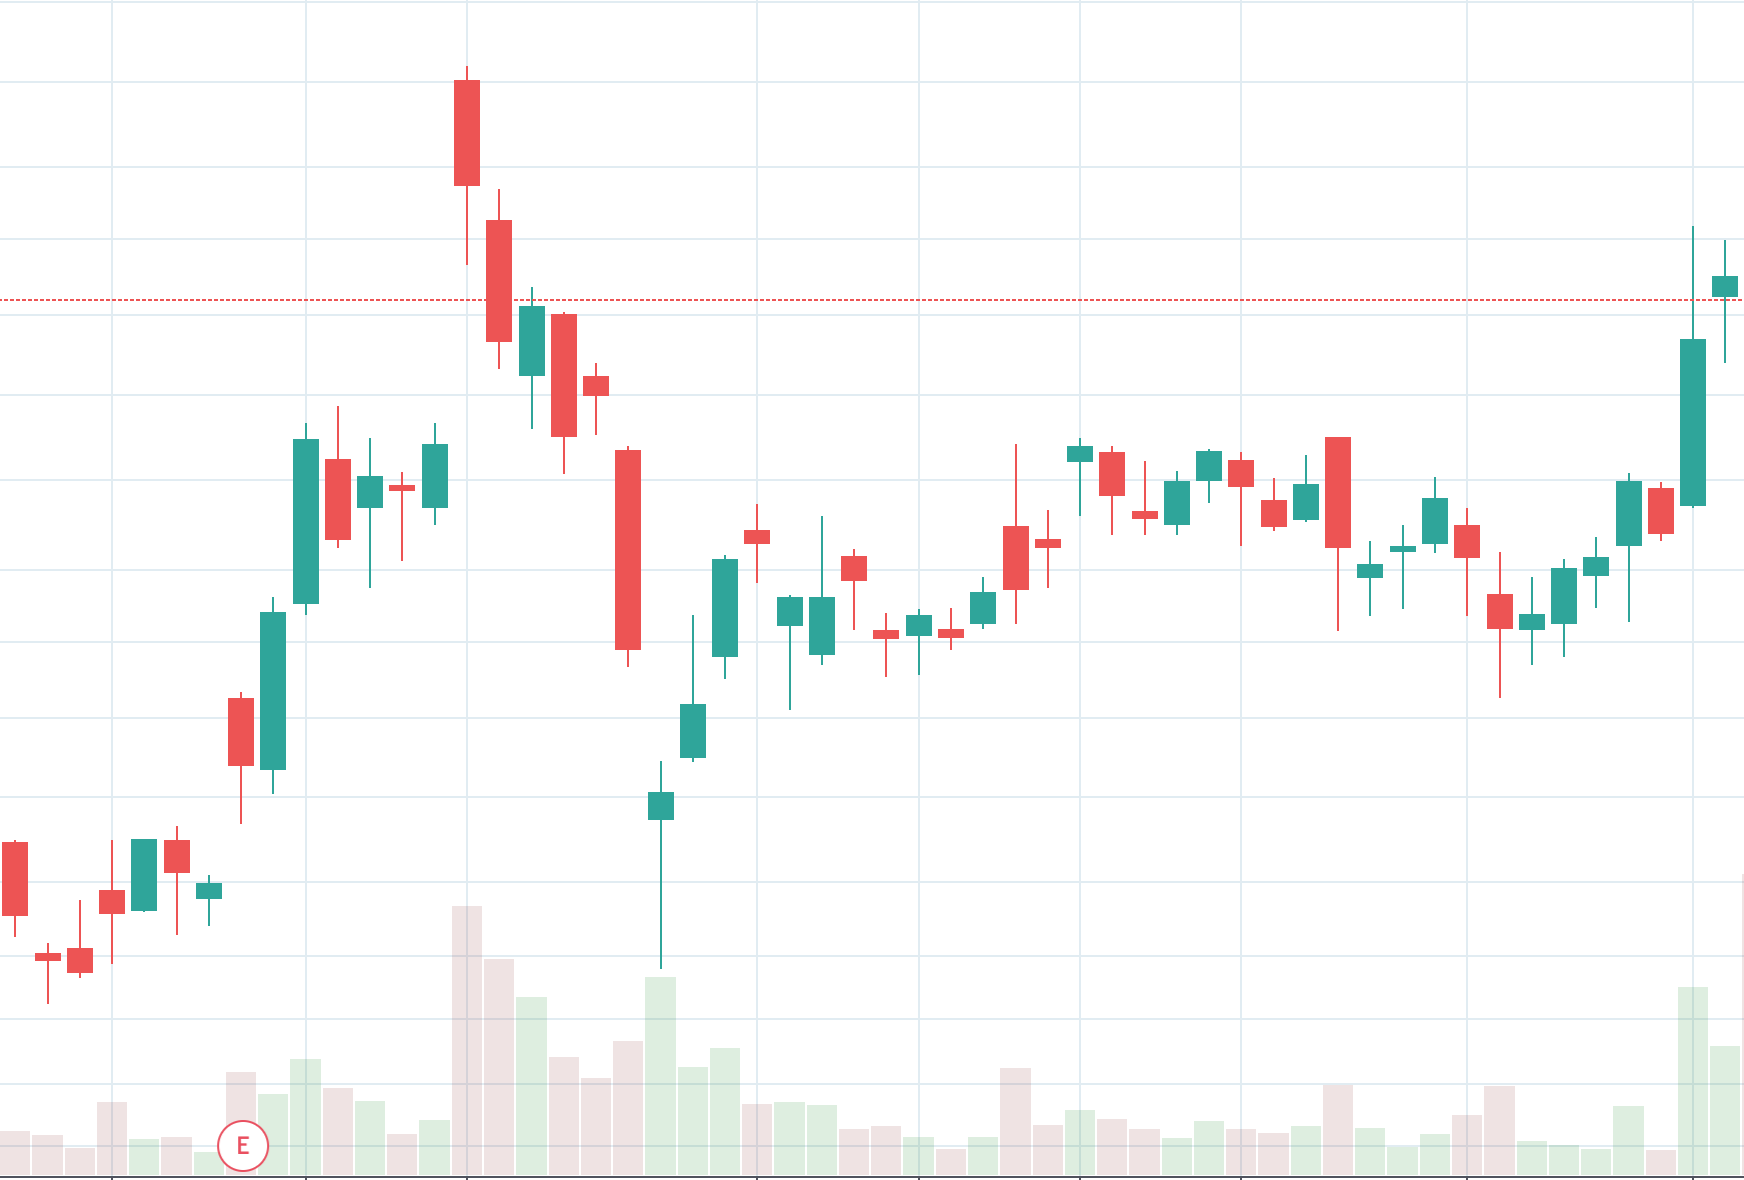

In [10]:
dataset["setup"] = (dataset.low < dataset.BBL) & (dataset.close > dataset.BBL) & \
                   (dataset.close_pos > 70) & (dataset.open_pos > 70) & (dataset.range_perc > 1)

dataset[dataset.setup == True]

,open,high,low,close,volume,range_perc,open_pos,close_pos,SMA20,STD20,BBU,BBL,setup
date,,,,,,,,,,,,,
2001-08-16,0.33,0.33,0.32,0.33,288097600,3.125000,100.000000,100.000000,0.3400,0.007947,0.355894,0.324106,True
2001-08-30,0.32,0.32,0.31,0.32,368715200,3.225806,100.000000,100.000000,0.3315,0.009333,0.350166,0.312834,True
2002-06-04,0.41,0.41,0.40,0.41,347900000,2.500000,100.000000,100.000000,0.4315,0.015652,0.462805,0.400195,True
2002-06-05,0.41,0.41,0.40,0.41,277082400,2.500000,100.000000,100.000000,0.4320,0.014726,0.461451,0.402549,True
2002-06-20,0.31,0.31,0.30,0.31,396732000,3.333333,100.000000,100.000000,0.3885,0.039904,0.468309,0.308691,True
2002-12-04,0.27,0.27,0.26,0.27,327099752,3.846154,100.000000,100.000000,0.2815,0.009881,0.301262,0.261738,True
2003-01-24,0.25,0.25,0.24,0.25,306092640,4.166667,100.000000,100.000000,0.2580,0.006959,0.271917,0.244083,True
2003-11-17,0.38,0.38,0.37,0.38,229169192,2.702703,100.000000,100.000000,0.4030,0.012183,0.427366,0.378634,True
2003-12-17,0.36,0.36,0.35,0.36,274258264,2.857143,100.000000,100.000000,0.3705,0.009445,0.389390,0.351610,True


"st" = "strategy"

In [11]:
dataset["st1"] = np.where(dataset.setup.shift(1) == True, dataset.close.shift(0) - dataset.open, np.nan)
dataset["st2"] = np.where(dataset.setup.shift(1) == True, dataset.close.shift(-1) - dataset.open, np.nan)
dataset["st3"] = np.where(dataset.setup.shift(1) == True, dataset.close.shift(-2) - dataset.open, np.nan)
dataset["st4"] = np.where(dataset.setup.shift(1) == True, dataset.close.shift(-3) - dataset.open, np.nan)
dataset["st5"] = np.where(dataset.setup.shift(1) == True, dataset.close.shift(-4) - dataset.open, np.nan)
dataset["st6"] = np.where(dataset.setup.shift(1) == True, dataset.close.shift(-5) - dataset.open, np.nan)
dataset["st7"] = np.where(dataset.setup.shift(1) == True, dataset.close.shift(-6) - dataset.open, np.nan)
dataset["st8"] = np.where(dataset.setup.shift(1) == True, dataset.close.shift(-7) - dataset.open, np.nan)
dataset["st9"] = np.where(dataset.setup.shift(1) == True, dataset.close.shift(-8) - dataset.open, np.nan)
dataset["st10"] = np.where(dataset.setup.shift(1) == True, dataset.close.shift(-9) - dataset.open, np.nan)

dataset[dataset.setup.shift(1) == True]

,open,high,low,close,volume,range_perc,open_pos,close_pos,SMA20,STD20,...,st1,st2,st3,st4,st5,st6,st7,st8,st9,st10
date,,,,,,,,,,,,,,,,,,,,,
2001-08-17,0.32,0.33,0.32,0.32,208432000,3.125000,0.000000,0.000000,0.3380,0.007678,...,0.00,0.00,0.01,0.00,0.01,0.02,0.01,0.00,0.00,0.01
2001-08-31,0.32,0.33,0.32,0.33,217280000,3.125000,0.000000,100.000000,0.3305,0.008256,...,0.01,0.01,0.01,0.00,-0.01,-0.01,-0.02,-0.03,-0.02,-0.04
2002-06-05,0.41,0.41,0.40,0.41,277082400,2.500000,100.000000,100.000000,0.4320,0.014726,...,0.00,-0.01,-0.03,-0.03,-0.04,-0.05,-0.06,-0.05,-0.04,-0.05
2002-06-06,0.41,0.41,0.39,0.40,260064000,5.128205,100.000000,50.000000,0.4300,0.016222,...,-0.01,-0.03,-0.03,-0.04,-0.05,-0.06,-0.05,-0.04,-0.05,-0.10
2002-06-21,0.30,0.31,0.30,0.30,445194400,3.333333,0.000000,0.000000,0.3810,0.041789,...,0.00,0.01,0.01,0.00,0.00,0.02,0.00,0.00,0.01,0.03
2002-12-05,0.27,0.27,0.26,0.26,244584536,3.846154,100.000000,0.000000,0.2790,0.008522,...,-0.01,0.00,-0.01,0.00,0.01,0.00,-0.01,0.00,0.00,-0.01
2003-01-27,0.24,0.26,0.24,0.25,392120792,8.333333,0.000000,50.000000,0.2575,0.007164,...,0.01,0.02,0.03,0.02,0.02,0.02,0.02,0.02,0.01,0.02
2003-11-18,0.38,0.38,0.36,0.36,268370256,5.555556,100.000000,0.000000,0.4005,0.015381,...,-0.02,-0.02,-0.02,-0.02,0.00,-0.01,-0.01,-0.01,0.01,0.00
2003-12-19,0.36,0.36,0.35,0.35,453654488,2.857143,100.000000,0.000000,0.3700,0.010260,...,-0.01,-0.01,-0.01,0.00,0.01,0.02,0.02,0.04,0.03,0.04


In [12]:
dataset[dataset.setup == True].index

DatetimeIndex(['2001-08-16', '2001-08-30', '2002-06-04', '2002-06-05',
               '2002-06-20', '2002-12-04', '2003-01-24', '2003-11-17',
               '2003-12-17', '2005-05-11', '2007-08-01', '2008-07-21',
               '2010-05-06', '2010-08-27', '2012-10-09', '2012-11-16',
               '2015-07-07', '2015-10-01', '2015-12-16', '2015-12-21',
               '2018-02-09', '2019-05-10', '2020-03-23', '2021-02-24'],
              dtype='datetime64[ns]', name='date', freq=None)

In [13]:
occurrences = dataset[dataset.setup == True].count()[0]
occurrences

24

In [14]:
results = []

In [15]:
profit = round(dataset.st1.sum(),2)
winning_trades = dataset[dataset.st1 > 0].count()[0]
loosing_trades = dataset[dataset.st1 <= 0].count()[0]
print("Strategy_1:", profit, "with", winning_trades, "winning trades and", 
      loosing_trades, "loosing trades")
results.append(profit)

Strategy_1: -0.1 with 9 winning trades and 15 loosing trades


In [16]:
profit = round(dataset.st2.sum(),2)
winning_trades = dataset[dataset.st2 > 0].count()[0]
loosing_trades = dataset[dataset.st2 <= 0].count()[0]
print("Strategy_2:", profit, "with", winning_trades, "winning trades and", 
      loosing_trades, "loosing trades")
results.append(profit)

Strategy_2: 0.11 with 12 winning trades and 12 loosing trades


In [17]:
profit = round(dataset.st3.sum(),2)
winning_trades = dataset[dataset.st3 > 0].count()[0]
loosing_trades = dataset[dataset.st3 <= 0].count()[0]
print("Strategy_3:", profit, "with", winning_trades, "winning trades and", 
      loosing_trades, "loosing trades")
results.append(profit)

Strategy_3: 12.61 with 14 winning trades and 10 loosing trades


In [18]:
profit = round(dataset.st4.sum(),2)
winning_trades = dataset[dataset.st4 > 0].count()[0]
loosing_trades = dataset[dataset.st4 <= 0].count()[0]
print("Strategy_4:", profit, "with", winning_trades, "winning trades and", 
      loosing_trades, "loosing trades")
results.append(profit)

Strategy_4: 9.48 with 11 winning trades and 13 loosing trades


In [19]:
profit = round(dataset.st5.sum(),2)
winning_trades = dataset[dataset.st5 > 0].count()[0]
loosing_trades = dataset[dataset.st5 <= 0].count()[0]
print("Strategy_5:", profit, "with", winning_trades, "winning trades and", 
      loosing_trades, "loosing trades")
results.append(profit)

Strategy_5: 9.26 with 16 winning trades and 8 loosing trades


In [20]:
profit = round(dataset.st6.sum(),2)
winning_trades = dataset[dataset.st6 > 0].count()[0]
loosing_trades = dataset[dataset.st6 <= 0].count()[0]
print("Strategy_6:", profit, "with", winning_trades, "winning trades and", 
      loosing_trades, "loosing trades")
results.append(profit)

Strategy_6: 5.37 with 14 winning trades and 10 loosing trades


In [21]:
profit = round(dataset.st7.sum(),2)
winning_trades = dataset[dataset.st7 > 0].count()[0]
loosing_trades = dataset[dataset.st7 <= 0].count()[0]
print("Strategy_7:", profit, "with", winning_trades, "winning trades and", 
      loosing_trades, "loosing trades")
results.append(profit)

Strategy_7: 3.18 with 12 winning trades and 12 loosing trades


In [22]:
profit = round(dataset.st8.sum(),2)
winning_trades = dataset[dataset.st8 > 0].count()[0]
loosing_trades = dataset[dataset.st8 <= 0].count()[0]
print("Strategy_8:", profit, "with", winning_trades, "winning trades and", 
      loosing_trades, "loosing trades")
results.append(profit)

Strategy_8: -1.1 with 11 winning trades and 13 loosing trades


In [23]:
profit = round(dataset.st9.sum(),2)
winning_trades = dataset[dataset.st9 > 0].count()[0]
loosing_trades = dataset[dataset.st9 <= 0].count()[0]
print("Strategy_9:", profit, "with", winning_trades, "winning trades and", 
      loosing_trades, "loosing trades")
results.append(profit)

Strategy_9: 2.3 with 13 winning trades and 11 loosing trades


In [24]:
profit = round(dataset.st10.sum(),2)
winning_trades = dataset[dataset.st10 > 0].count()[0]
loosing_trades = dataset[dataset.st10 <= 0].count()[0]
print("Strategy_10:", profit, "with", winning_trades, "winning trades and", 
      loosing_trades, "loosing trades")
results.append(profit)

Strategy_10: 4.95 with 12 winning trades and 12 loosing trades


In [25]:
results

[-0.1, 0.11, 12.61, 9.48, 9.26, 5.37, 3.18, -1.1, 2.3, 4.95]

In [26]:
plotting_results = pd.DataFrame(results, columns = ["results"], 
                                index = ["1 day", "2 days", "3 days", "4 days", "5 days", 
                                         "6 days","7 days", "8 days", "9 days", "10 days"])
plotting_results

,results
1 day,-0.10
2 days,0.11
3 days,12.61
4 days,9.48
5 days,9.26
6 days,5.37
7 days,3.18
8 days,-1.10
9 days,2.30
10 days,4.95


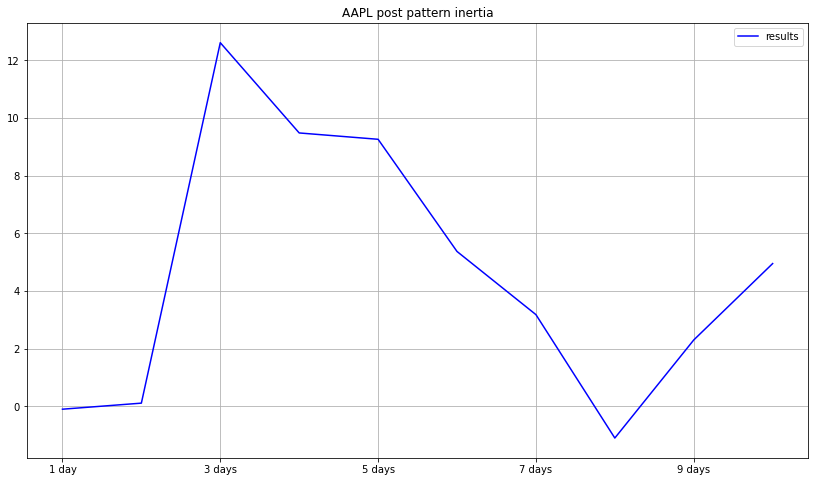

In [29]:
plotting_results.plot(figsize = [14,8], color = "blue").grid()
plt.title(ticker + " post pattern inertia");